# Bond Biography of the American Revolution Bonds
Our goal is to produce a biography of the bonds used to fund the American Revolution.

**Team Members**: Elizabeth Zhang, Isabella Smojver, Miritika Omkumar, Sanjeev Subramanian, 

**Outline**:
1. Introduction about the bonds and historical context of the American Revolution
2. Details about Pre-1790 certificates
   
   a. Details about Loan Office Certificates

   b. Details about Liquidated Debt Certificates

   c. Details about Pierce Certificates
   
4. Details and Graphs for Post-1790 stocks

## Section 1: Introduction
The American Revolution was a war fought on both strategy, resources, and support. The colonies were up against a monumental global rival in the British, making these three pillars ever more crucial. In order to develop a sufficient amount of supplies to the war such as cannons, pistols, and personal equipment, there needed to be contractors to directly supply the army. Add that to the government’s war expenses. The Continental Congress was struggling already with a depreciating currency, and public support from smaller investors was needed to continue funding the war and begin paying back international aid from France and the Netherlands. These bonds acted as a form of payment to these contractors and variations later served as a note of indebtedness from the Continental Congress that could be valued and obtained  later on. 

In all, the young colonies needed bonds to pay people that were directly supplying the war as well as continue gaining traction and public support to pay off the inevitable national debt we would have. The continental congress issued loan office certificates, liquidated debt certificates and Pierce certificates, which we will describe in more detail. Note that in this context, the words certificate, stocks and bonds are equivalent financial instruments. 

## Section 2: Pre-1790 Certificates

### Section 2a: Loan Office Certificates
#### Issuance Motivation
In general, these loan office certificates were needed for domestic financing loans. That is, there needed to be a way to pay for supplies, soldiers, and other maintenance. 

#### Who Promised to Repay the Loan?
The Continental Congress authorized warrants issued from various loan offices. Individuals who went to redeem their certificates were able to receive a portion of the original value. However, most were never fully repaid with the ‘present Situation of the Treasury’ cited as lack of ability to further pay. Most of these Loan Office Certificates were issued through the Quartermaster and Commissary departments. 

#### Who was Receiving the Payment?
Individuals and firms were receiving payments for various services that produced supplies for the war. Services included contracts for production of shells and cannons; after each contract was fulfilled, Continental Congress (CC) would authorize a warrant issue from a loan office. 

#### Bond Features
The initial coupon rate of loan office certificates in 1776 was 4%. Due to lack of public support from investors, in February 1777, Congress raised the interest rate to 6%. Principal values varied between 200 and 10,000 in Continental dollars. 

#### Redemption Date
The bonds were supposedly due in 1787; as a fixed date. 

#### Authorization Details
We don't have the exact number on how much the government was allowed to borrow. However, there were 80,913 loan office certificates issued between December 1776 and December 1781. 

#### Debt Marketing
<span style = "color:red">Read somewhere that loan office certificates often had proclamations attached to them after they were issued- near the loan offices themselves that way other small investors in town could read them and be more inclined to invest as well. However, I need to look deeper into some of the national archives to see if this was really something that occurred. </span>

According to Massachusetts State Revolutionary War Debt Certificates; after 1780 inflation made it too difficult for standard office certificates to continue to be issued. Thus, there was a transition to compensating soldiers in the form of commodity certificates; “Nominal sum would be paid out in the equivalent cost of 5 bushels of corn, 68 and 4/7 pounds of beef, 10 pounds of sheep’s wool, and 16 pounds of sole leather at the time of redemption.” (State Revolutionary War Debt Certificates, 1777-1789. (2024). Masshist.org. https://www.masshist.org/collection-guides/view/fao0004)


#### Who were the creditors?
Small investors who wanted to support the funding of the war; as stated in Tom and George’s Battle Plan document, the top purchasers were primarily men who were responsible for directly supplying the Army; that is, those contracted with producing supplies for the Army. In their analysis of purchasers of the loan office certificates, “Most were small investors with total purchases directly from the loan of under $100 in specie.” 

#### Bond Price History
These bonds were originally priced under the principal value of incrementals from 200 to 10,000 continental dollars. In the secondary market, they were valued against a depreciation schedule of the Continental dollar and eventually assigned a specie value that could be redeemed. <span style = "color:red">More information needed on the secondary market.</span>

#### Loan Contract Revisions
The most prominent revision that was made to the loan office certificates was the increasing of the interest rate by Continental Congress in 1777 from 4% to 6%. This made it more appealing for investors as they would create a higher yield for the investors. 


### Section 2b: Liquidated Debt Certificates
#### Issuance Motivation
Similar to the loan office certificates, Continental Congress promised to directly repay these loans. <span style = "color:red"> How was it confirmed that liquidated debt certificates were issued directly by Continental Congress? </span>

#### Who Promised to Repay the Loan?
The Continental Congress authorized warrants issued from various loan offices. Individuals who went to redeem their certificates were able to receive a portion of the original value. However, most were never fully repaid with the ‘present Situation of the Treasury’ cited as lack of ability to further pay. Most of these Loan Office Certificates were issued through the Quartermaster and Commissary departments. 

Ex: Colony of Massachusetts Bay indented loan certificate authorized in 1775 at 6% interest due 1777, State of Massachusetts Bay Treasury loan certificate, 6% interest due 1780 authorized May 2, 1777. 
Clearly there was a floating redemption date, but even the years between authorization and due date were not consistent.   


#### Who was Receiving the Payment?
Civilians were the primary recipients. These transactions were for war-related supply contracts. Many small American manufacturers expanded the domestic arms industry to meet the intense demand for weaponry; there was still scarcity [(https://www.americanrevolutioninstitute.org/exhibition/a-revolution-in-arms/)](https://www.americanrevolutioninstitute.org/exhibition/a-revolution-in-arms/). 

Interesting note: The Army tried to have direct control over real physical labor in the form of nailers, smiths, armorers, and carpenters. However, they had much less direct control over laborers for contractors for military supplies. To further the supply of military goods, Congress established agencies for intense, large scale manufacturing. 


#### Bond Features
Interest for debt certificates was 6% annually. <span style = "color:red">What were the principal values for these certificates?</span> 

#### Redemption Date
<span style = "color:red">Couldn’t find a set fixed year where the bonds were supposed to be redeemed. However, Congress assumed the national debt on August 4, 1790 and at that point individual state debts were liquidated and sunk. (https://www.masshist.org/collection-guides/view/fao0004) </span>

Ex: Colony of Massachusetts Bay indented loan certificate authorized in 1775 at 6% interest due 1777, State of Massachusetts Bay Treasury loan certificate, 6% interest due 1780 authorized May 2, 1777. 
Clearly there was a floating redemption date, but even the years between authorization and due date were not consistent.   


#### Authorization Details


#### Debt Marketing
These forms of certificates were marketed as a safer and longer term funding mechanism for the war. With a comparatively high interest rate from the outset (6%), this was immediately more appealing for investors. Buyers were sold on the idea that they would get their principal back plus interest. (https://allthingsliberty.com/2015/02/how-was-the-revolutionary-war-paid-for/ ) 

#### Who were the creditors?
Since these were targeted at the every day patriot, every day citizens were the most common investor. ** Don’t know if there’s much to expand on this section; could try to find the Massachusetts direct records of their state debt certificates and analyze that?

Ex: Nehemiah Allen Massachusetts Bay Treasury loan certificate, serial no. 823, issued for one hundred four pounds thirteen shillings on 1 December 1777. 
Who was Nehemiah Allen you ask? Well, there’s unfortunately many Nehemiah Allens from the American Revolutionary era. One strand of similarity was that they all had something to do with the War. There was a great-grandfather Nehemiah whose great-grandchild served in the War, another that served as a captain of the Third Company, and another that was a Private during the war. 

#### Bond Price History
There was no general issuance amount - this most likely varied by state. For example, Connecticut focused mainly on interest certificates rather than liquidated debt certificates, making it difficult to track initial amounts. However, Massachusetts records show issued amounts for ten, twenty, thirty, sixty, fifty-seven, twenty-nine, fourteen, twenty-three, eleven, one hundred four pounds/thirteen shillings, etc. There were not many records that went above the threshold of 200 pounds. ** Need help to understand the concept and numbers behind pricing in the secondary market! 

#### Loan Contract Revisions
There were no known revisions to the state liquidated debt certificates. 
![alt text](https://allthingsliberty.com/wp-content/uploads/2015/01/costchart.jpg)
Estimated Funding Sources (https://allthingsliberty.com/2015/02/how-was-the-revolutionary-war-paid-for/ ) 



### Section 2c: Pierce Certificates
#### Issuance Motivation
On July 4, 1783, Continental Congress authorized Paymaster General/Commissioner of Army Accounts to settle all accounts for back pay and rations owed to officers/soldiers of the Continental Army (Battle Plan Document)
    Throughout the Revolutionary War, as the Continental Congress fell behind on their repayments and regular payments to soldiers, they provided state liquidated debt certificates as discussed above. Thus, the government needed to settle “back pay”, or wages owed to soldiers for their services. 

#### Who Promised to Repay the Loan?
Continental Congress was promising to finally pay back the people that fought the War at the front line. Interest payments were held accountable by appointed Continental loan officers. 

Those receiving payments were soldiers, officers, and other front line workers who did not receive their original payments on time. 

#### Who was Receiving the Payment?
Those receiving payments were soldiers, officers, and other front line workers who did not receive their original payments on time. 

#### Bond Features
The certificates promised 6% interest annually. Each of these accounts would have varied with time served during the war. However, totals came out to be $10,832,921 in specie to 36,847 officers and soldiers. 

#### Redemption Date
The general promised redemption date was the end of the American Revolutionary war. ** Need to fact check this; assuming that normal payments didn’t really have a “long term” time frame, rather than just incremental monthly payments. One source says that they had an official date of July 1, 1784 [(https://powerlibrary.org/collection/pierces-certificate-accounts-circa-1784-1793/)](https://powerlibrary.org/collection/pierces-certificate-accounts-circa-1784-1793/) 

#### Authorization Details
Pierce issued over 93,000 final settlement certificates known as the Pierce certificates. The total value of $10,832,921 in specie to 36,847 officers. 


#### Debt Marketing
These were marketed as a way for soldiers to receive at least some portion of their original payments; they acted as a form of cash payment substitute. Some soldiers sold their certificates to speculators at a discount in order to create immediate funds, “Some discharged soldiers sold their certificates to investors for literally pennies on the dollar.” (https://allthingsliberty.com/2015/02/how-was-the-revolutionary-war-paid-for/) 

#### Who were the creditors?
Soldiers, officers, citizens who bought materials for the war were all issued these Congress based debt certificates by Pierce. 

#### Bond Price History
Original loan amounts were varied. <span style = "color:red">Will try and access the original Pierce bank documents that have records of all of the certificate rolls that were issued during a certain time frame.</span> As stated in terms of marketability, there was a possibility for soldiers to receive liquid cash by selling these bonds to a speculator or other investor, but usually for a minute fraction of the original value. Remember, these Pierce Certificates were also already a fraction of what the Continental Congress owed to these soldiers. 

#### Loan Contract Revisions
In 1776, Congressed promised soldiers who served until the end of the war a one-time $80 payment. This was later modified to half-pay for life, then later near the end of the Revolutionary War, five years of full pay. There was clearly a lack of confidence from the soldiers that they would be paid in full after the war, but there was incentive created to stick around and cash in on their “post-war benefits”. 

## Section 3: Bond Biographies for the Post-1790 Stocks

### OVERVIEW
Following the end of the American Revolution in 1783, the Continental Congress's inability to pay back most of its acquired debt that helped fund the war raised growing skepticism in the economy amongst debtholders (civilians and soldiers) regarding if the debt would ever be repaid. In an attempt to restore credibility to the United States debt system, Hamilton proposed three new bonds with varying interest rates under The Funding Act of 1790. Such bonds would allow the government to slowly pay off all of its debt, while also paying back its creditors. The bonds were crucial in building a more organized debt structure that gave debtholders a higher rate of return on their investments, while ultimately establishing the government’s creditworthiness as a “worthy borrower” so that it could be able to borrow money efficiently for future purchases.

By “assuming” both the Continental Congress and state debts, the American government took on the responsibility of paying back the debt that the Continental Congress and state governments had accrued in fighting the war, which included unpaid interest payments and principal on the debt. This amounted to a total of 74.3 million Spanish dollars (Hall, G.J. and Sargent, T.J. 148–166). Hamilton believed that the issuance of these three new bonds with varying interest rates would overall yield a higher market value than what the debt was previously traded at on the market, ultimately restoring more payment back to the original investors compared to without the plan. While investors still redeemed less than the face value of the debt under Hamilton’s plan, the market value of the debt was more than three times greater than the trading value of the debt prior to the Funding Act of 1790.

### The Funding Act of 1790 created three new types of bonds:

1. **6% stock** (paid 6% coupon quarterly)
2. **Deferred 6% stock** (paid no coupon until 1801 and then 6% after)
   - Creditors would get a greater return on their investment in the long run than the short run 
3. **3% stock** (paid 3% coupon quarterly)

### Additional features of these bonds:

The three bonds issued had no maturity date. People were paid back in the form of perpetual bonds that did not have a specific date of bond redemption for when the bond had to be paid back at face value. The treasury could purchase at market prices the three bonds issued, up to an amount not exceeding 8% of the total face value and any interest payments due of all bonds issued (ie: If 20 million was issued, the treasury could purchase up to 160k on the market). This prevented the Treasury from repurchasing the full debt back. It also improved liquidity in the market (the buying and selling of bonds). Additionaly, consols (perpetual bonds) could be used to purchase public land (this reduced the government debt by allowing the consols to be exchanged for land).

### Reasons for the issuance of the bonds:

1. **Establishment of public credit**: by restructuring its debt system, the government aimed to build its creditworthiness and establish itself as a “worthy borrower” so that it could be able to borrow money for future purchases.
2. **Restructuring the existing domestic debt**: replacing the old debt by exchanging various debt certificates for new bonds built a more organized debt structure that made it easier to manage the debt.
3. **To assume state debts**: the federal government took on the responsibility of the states to pay back the debt in order to strengthen the government’s power and credibility, while also creating a more equitable debt distribution system across all states. The federal government recognized that the debt owed by individual states needed a national effort to repay.

### Price history on the secondary market:

Hamilton wanted a temporary reduction in interest on debt holdings from creditors in order to avoid “tax resistance”. In this context tax resistance refers to widespread unrest caused by the implementation of heavy taxes. Hamilton wanted to mitigate such resistance, especially since the primary objective of the American Revolution was to end taxation by the British colonies on its subjects. Hamilton’s plan was to reduce the interest rate on debt holdings to creditors in promise of a higher rate of return in investments "above the market rate of interest in the long term" (Edling, Max. "So Immense a Power in the Affairs of War," p. 312) His plan successfully restored the credit of the nation and suppressed previous doubts about whether the debt could be paid back.

While the the market value of the bonds was below their face value, it still traded for three times greater than the trading value of the debt, as mentioned under the "overview" of this bond-biography. Specifically, while debtholders would gain only 20 dollars for every 100 dollars prior to the plan, they would be able to trade up to 75 dollars for every 100 dollars after the Funding Act of 1790. 
Creditors who doubted whether the Congress could pay back the debt would sell their debt securities (IOU’s) to speculators at low interest rates. These speculators made a profit through this exchange. Further depreciation in debtholdings through these exchanges made more apparent the drastic improvement in the gain of money value under Hamilton's Plan. 

Overall, prior to Hamilton’s Plan, Congress was unsuccessful in paying back most of its acquired debt.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# load data
bond_h5 = pd.HDFStore("data/BondDF.h5", mode="r")
bond_price = bond_h5["BondPrice"]
bond_h5.close()

In [7]:
# helper data structures
l1_ids_of_interest = [20021, 20022, 20023]
bond_names = {
    20021: "Six Per Cent Stock of 1790",
    20022: "Deferred Six Per Cent Stock of 1790",
    20023: "Three Per Cent Stock of 1790"
}

In [8]:
# data cleaning
bond_price.reset_index(inplace=True)
bond_price['Date'] = pd.to_datetime(bond_price['index'], errors='coerce')
bond_price.set_index('Date', inplace=True)
bond_price.drop(columns=['index'], inplace=True)

/var/folders/5s/dvrxt95949x1pm_sjxm85lj00000gn/T/ipykernel_63681/128966886.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  bond_price.drop(columns=['index'], inplace=True)


In [9]:
# create debt dataframes
federal_debt = []
state_debt = []

for date in bond_price.index.unique():
    six_percent_price = bond_price.loc[date, (20021, 'Average')]
    deferred_six_percent_price = bond_price.loc[date, (20022, 'Average')]
    three_percent_price = bond_price.loc[date, (20023, 'Average')]
    
    if pd.notna(six_percent_price) and pd.notna(deferred_six_percent_price) and pd.notna(three_percent_price):
        federal_price = (2/3 * six_percent_price) + (1/3 * deferred_six_percent_price)
        state_price = (4/9 * six_percent_price) + (2/9 * deferred_six_percent_price) + (3/9 * three_percent_price)
        federal_debt.append({'Date': date, 'Price': federal_price})
        state_debt.append({'Date': date, 'Price': state_price})

federal_debt_df = pd.DataFrame(federal_debt)
state_debt_df = pd.DataFrame(state_debt)


In [10]:
def plot_stock_prices(bond_price, l1_ids_of_interest, bond_names):
    plt.figure(figsize=(12, 6))
    for l1_id in l1_ids_of_interest:
        bond_data = bond_price[(l1_id, 'Average')].dropna()
        plt.plot(bond_data.index, bond_data.values, label=bond_names[l1_id])
    plt.title('Prices of Selected Stocks Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_debt_prices(federal_debt_df, state_debt_df):
    plt.figure(figsize=(12, 6))
    plt.plot(federal_debt_df['Date'], federal_debt_df['Price'], label='Federal Debt', linestyle='--', color='b')
    plt.plot(state_debt_df['Date'], state_debt_df['Price'], label='State Debt', linestyle='--', color='r')
    plt.title('Prices of Federal and State Debt Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_all_prices(bond_price, l1_ids_of_interest, bond_names, federal_debt_df, state_debt_df):
    plt.figure(figsize=(12, 6))
    for l1_id in l1_ids_of_interest:
        bond_data = bond_price[(l1_id, 'Average')].dropna()
        plt.plot(bond_data.index, bond_data.values, label=bond_names[l1_id])
    plt.plot(federal_debt_df['Date'], federal_debt_df['Price'], label='Federal Debt', linestyle='--', color='b')
    plt.plot(state_debt_df['Date'], state_debt_df['Price'], label='State Debt', linestyle='--', color='r')
    plt.title('Prices of Selected Stocks and Federal/State Debt Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

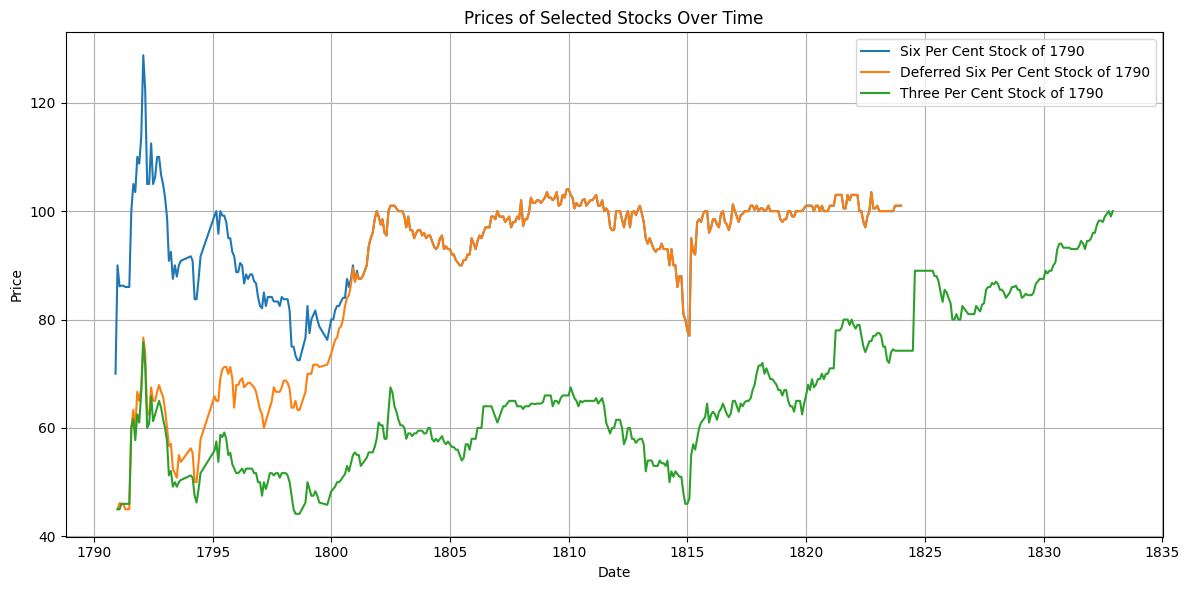

In [11]:
plot_stock_prices(bond_price, l1_ids_of_interest, bond_names)

### Graph Trends
- **Upward Spike ~1792, 1793**: This could be due to the ratification of the US Constitution in 1788 and the establishment of a stronger federal government. Additionally, the bonds were mainly issued between 1791 and 1793. Under Hamilton’s plan, there was growing confidence that the economy could pay back its debt. Hamilton issued low interest rates to help pay  off the debt, while simultaneously paying back debtholders more on their debtholdings despite these lower rates. Such factors are consistent with the rise in stocks in the early 1790s.
- **Consistent Decline in the Late 1790s and Rise in the Early 1800s**: Possible reasons for the decline in the late 1790s include political instability during the Quasi-War with France (1798-1800) and the impact of the Jay Treaty (1795). The rise in the early 1800s could be due to Jefferson entering office and the Louisiana Purchase (1803), which likely increased investor confidence. Successful debt repayments under Hamilton’s Plan in the 1790s also played a role.
- **Decline During the War of 1812**: The War of 1812 (1812-1815) caused prices to plummet as people had less confidence in the government's ability to repay debts during wartime.
- **Deferred 6% Stock Rise Towards ~100 in the Early 1800s**: The dramatic rise was approaching the date when the bonds would start paying 6% interest, driving investor anticipation and bond prices higher. The Louisiana Purchase might have also influenced this.
- **Post-1815 Increase**: The end of the War of 1812 and the establishment of the Second Bank of the United States in 1816 likely contributed to the increase in bond prices. 

### Types of Loans Secured by the Continental Government

The Continental government secured:
- **Loan office certificates** were issued by loan offices in each state.
Prior to 1790, loan office certificates were purchased by small investors and quartermasters (used to purchase goods and pay for supplies for the army).
During the post-1790s, owners of domestic debt, which included loan office certificates, would receive a value of the three new bonds issued.
- **Final settlement certificates** (known as “Pierce certificates”) were issued to civilians and soldiers.
Further authorized by the Continental Congress, and issued by the Paymaster General and Commissioner of Army Accounts (John Pierce), final settlement certificates were debt certificates of rations owed to soldiers and officers of the Continental army for their services during the war.
- **Paper monies in the form of Continental dollars** (not interest-bearing) were originally used to buy loan office certificates, as well as pay back investors and also fund the war effort. After the Continental Congress was hindered from taxing under the Articles of Confederation, the value of paper monies collapsed significantly in 1778 and 1779. Under the Funding Act of 1790, 100 Continental dollars now traded for 1 Spanish dollar.
- **Foreign loans** consisted of French loans, Holland loans, and loans from Spain during the 1790s. Foreign loans were used to cover "current expenses" and compensate government officials. It is important to note that Hamilton's main focus was on paying back the domestic debt. As stated from source Bayley on page 32, section 2 of the Funding Act of 1790 "authorized a loan of 12,000,000 dollars to be applied to the payment of the principal and interest of the foreign debt." 

### Original Loan Contracts and Revisions

Congress attempted to pay people back through certificates of debt in the 1780s. Under Hamilton’s Plan, paying back the debt applied to both Continental dollars, referred as "bills of credit," and interest-bearing debts (mostly the latter since they have debt-ownership records that can be traced back only for interest-bearing debts, while Continental dollars heavily depreciated over time). 100 Spanish dollars could only be redeemed for about 20 Spanish dollars prior to the plan. The offered value was worth significantly less than the face value in the provided example. Being unable to tax, the Continental Congress was unable to raise enough money to pay interest on the debts, as well as the original principal payments. 

To recap, debt values comprised of:
- Interest-bearing debts issued by the Continental Congress.
- State-issued debts.
- Continental Dollars (paper currency).
- Other forms of IOUs or certificates.

Total debt amount of the United States in 1790 totaled to $52,788,722.03 (source Bayley, p. 31).

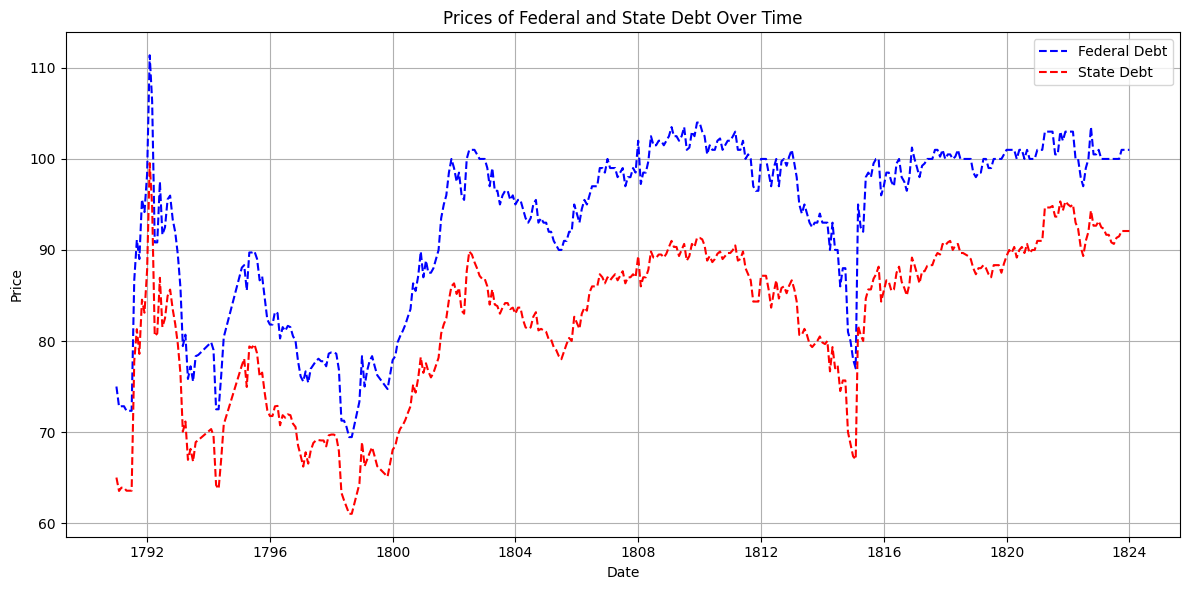

In [12]:
plot_debt_prices(federal_debt_df, state_debt_df)

### Federal Debt

After assuming both Continental Congress and state debts, the federal government's total debt reached 74.3 million Spanish Dollars in September of 1790. For domestic federal debt, owners received two-thirds of the six percent stock and one-third of the deferred six percent stock. Owners of indent received 3% stock. The stocks helped create a more organized structure of debt repayment that utilized immediate payments through the 3% and 6% stocks, while the 6% deferred stock gave the government more room to spread out its debt payments. This lessened the financial burden on the government in the short-term, while guaranteeing creditors their debt repayments. The debtholders who bought the debt included holders of loan office certificates, certificates of indebtedness, as well as speculators who bought IOU’s at low interest rates from creditors. 



### State Debt

Regarding the state debt, the government was authorized to borrow 21,500,000 dollars in the Funding Act. A total of 18,271,787 dollars was assumed from source Bayley. 21,002,107 dollars was assumed from George Hall’s and Tom Sargent’s own records. For state-assumed debts, owners received 4/9 in the 6 percent stock, 2/9 in the deferred six percent stock, and 3/9 in the 3 percent stock. This included both principal and unpaid coupon payments. State debts varied by state, as some states had paid off most, if not all, of their debt, while other states still owed a majority of the debt mostly due to acquiring unpaid interest. As an example of what was authorized in the Funding Act, Delaware and Rhode Island owed the least state debt (200,000 dollars) while Massachusetts and Virginia owed the majority of the debt (4,000,000 dollars and 3,500,000 dollars, respectively).   

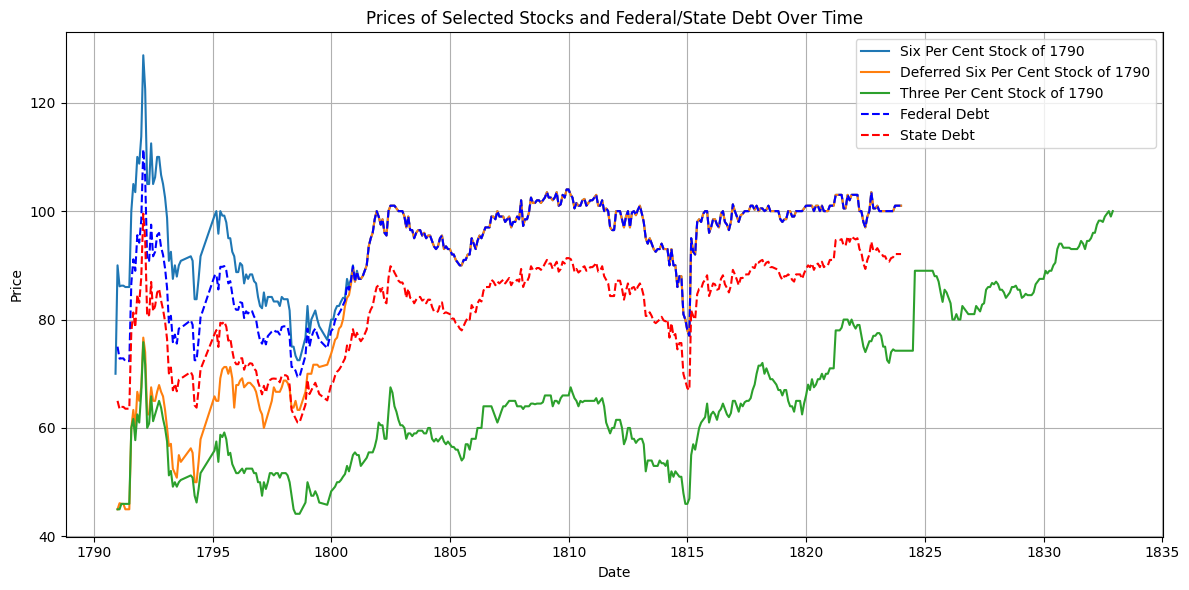

In [13]:
plot_all_prices(bond_price, l1_ids_of_interest, bond_names, federal_debt_df, state_debt_df)